Цель

Реализовать классификацию сортов растения ирис (Iris Setosa - 0, Iris Versicolour - 1, Iris
Virginica - 2) по четырем признакам: размерам пестиков и тычинок его цветков.

Задачи

- Ознакомиться с задачей классификации
- Загрузить данные
- Создать модель ИНС
- Настроить параметры обучения
- Обучить и оценить модель

Импортируем необходимые для работы классы и функции. Кроме Keras понадобится
Pandas для загрузки данных и scikit-learn для подготовки данных и оценки модели.

In [2]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float) # входные данные
Y = dataset[:,4] # выходные данные

In [4]:
encoder = LabelEncoder() 
encoder.fit(Y) # загружаем выходные данные в энкодер
encoded_Y = encoder.transform(Y) # считаем количество вариантов 
dummy_y = to_categorical(encoded_Y) # разбиваем

In [5]:
model = Sequential() # есть один входной и один выходной тензор
model.add(Dense(4, activation='relu')) # обычные нейронные слои с разной
model.add(Dense(3, activation='softmax')) # функцией активации

In [6]:
model.compile( # создание модели
    optimizer='adam', # оптимизатор меняет веса исходя из функции потерь
    loss='categorical_crossentropy', # функция потерь используется для поиска ошибок в процессе обучения
    metrics=['accuracy'], # точность модели
)

In [7]:
first = model.fit(X, dummy_y, epochs=75, batch_size=10,
validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 1s 16ms/step - loss: 9.0525 - accuracy: 0.2593 - val_loss: 8.4638e-06 - val_accuracy: 1.0000
Epoch 2/75
14/14 [==============================] - 0s 3ms/step - loss: 8.4774 - accuracy: 0.2593 - val_loss: 2.2109e-05 - val_accuracy: 1.0000
Epoch 3/75
14/14 [==============================] - 0s 3ms/step - loss: 7.9216 - accuracy: 0.2593 - val_loss: 5.6662e-05 - val_accuracy: 1.0000
Epoch 4/75
14/14 [==============================] - 0s 4ms/step - loss: 7.3757 - accuracy: 0.2593 - val_loss: 1.4307e-04 - val_accuracy: 1.0000
Epoch 5/75
14/14 [==============================] - 0s 4ms/step - loss: 6.8320 - accuracy: 0.2593 - val_loss: 3.6485e-04 - val_accuracy: 1.0000
Epoch 6/75
14/14 [==============================] - 0s 3ms/step - loss: 6.3011 - accuracy: 0.2593 - val_loss: 9.3223e-04 - val_accuracy: 1.0000
Epoch 7/75
14/14 [==============================] - 0s 2ms/step - loss: 5.7593 - accuracy: 0.2593 - val_loss: 0.0023 - val_accuracy: 1.

In [8]:
model1 = Sequential() 
model1.add(Dense(4, activation='relu')) 
model1.add(Dense(3, activation='softmax')) 
model1.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
)
second = model1.fit(X, dummy_y, epochs=25, batch_size=10, # уменьшил кол-во эпох
validation_split=0.1)
model2 = Sequential() 
model2.add(Dense(4, activation='relu')) 
model2.add(Dense(3, activation='softmax')) 
model2.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
)
third = model2.fit(X, dummy_y, epochs=75, batch_size=5, # уменьшил изменение весов
validation_split=0.1)
model3 = Sequential() 
model3.add(Dense(4, activation='relu')) 
model3.add(Dense(8, activation='relu')) # добавил еще один слой нейронов
model3.add(Dense(3, activation='softmax'))
model3.compile( 
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
)
fourth = model3.fit(X, dummy_y, epochs=75, batch_size=10, 
validation_split=0.1)

Epoch 1/25
14/14 [==============================] - 0s 11ms/step - loss: 1.9728 - accuracy: 0.3704 - val_loss: 1.3706 - val_accuracy: 0.0000e+00
Epoch 2/25
14/14 [==============================] - 0s 3ms/step - loss: 1.8467 - accuracy: 0.3704 - val_loss: 1.3222 - val_accuracy: 0.0000e+00
Epoch 3/25
14/14 [==============================] - 0s 3ms/step - loss: 1.7297 - accuracy: 0.3704 - val_loss: 1.2970 - val_accuracy: 0.0000e+00
Epoch 4/25
14/14 [==============================] - 0s 3ms/step - loss: 1.6344 - accuracy: 0.3704 - val_loss: 1.2871 - val_accuracy: 0.0000e+00
Epoch 5/25
14/14 [==============================] - 0s 3ms/step - loss: 1.5469 - accuracy: 0.3704 - val_loss: 1.3076 - val_accuracy: 0.0000e+00
Epoch 6/25
14/14 [==============================] - 0s 3ms/step - loss: 1.4743 - accuracy: 0.3704 - val_loss: 1.3255 - val_accuracy: 0.0000e+00
Epoch 7/25
14/14 [==============================] - 0s 2ms/step - loss: 1.4054 - accuracy: 0.3704 - val_loss: 1.3552 - val_accuracy: 0.

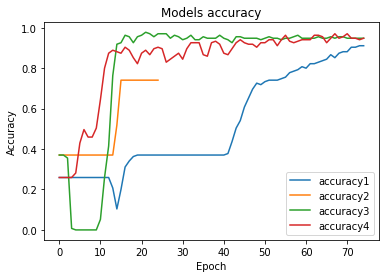

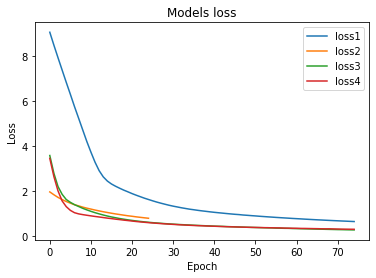

In [9]:
plt.plot(first.history['accuracy'])
plt.plot(second.history['accuracy'])
plt.plot(third.history['accuracy'])
plt.plot(fourth.history['accuracy'])
plt.title('Models accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy1', 'accuracy2', 'accuracy3', 'accuracy4'], loc='best')
plt.show()

plt.plot(first.history['loss'])
plt.plot(second.history['loss'])
plt.plot(third.history['loss'])
plt.plot(fourth.history['loss'])
plt.title('Models loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss1', 'loss2', 'loss3', 'loss4'], loc='best')
plt.show()